## Final Project Submission

Please fill out:
* Student name: Ice Asortse
* Student pace:Full time
* Scheduled project review date/time: 11/7/2019
* Instructor name: Rafael
* Blog post URL:


# Introduction
## Investigating the factors that drive housing prices

### Loading up libraries

In [403]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
%matplotlib inline
inline_rc = dict(mpl.rcParams)

plt.style.use('seaborn')

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import normaltest as normtest # D'Agostino and Pearson's omnibus test

from collections import Counter
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [404]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 4CD3-443B

 Directory of C:\Users\Ice Asortse\FlatironData\ProjectMod1\dsc-v2-mod1-final-project-online-ds-ft-100719

11/07/2019  03:51 PM    <DIR>          .
11/07/2019  03:51 PM    <DIR>          ..
10/21/2019  12:12 PM               146 .gitignore
11/05/2019  10:17 AM    <DIR>          .ipynb_checkpoints
10/21/2019  12:12 PM                93 .learn
10/21/2019  12:12 PM         1,425,341 awesome.gif
10/21/2019  12:12 PM             1,120 column_names.md
10/21/2019  12:12 PM             1,846 CONTRIBUTING.md
10/21/2019  12:12 PM         2,475,934 kc_house_data.csv
10/21/2019  12:12 PM             1,354 LICENSE.md
10/21/2019  12:12 PM            79,134 module1_project_rubric.pdf
10/30/2019  12:48 PM           742,738 OSEMIN_scaffolding.ipynb
10/21/2019  12:12 PM            13,290 README.md
11/07/2019  03:51 PM         1,020,042 student.ipynb
10/29/2019  10:30 AM         1,601,070 study_group_starter.ipynb
11/05/2019  02:46 PM     

In [405]:
# import and getting basic info about the data
df = pd.read_csv('kc_house_data.csv')
display(df.head())
#df.info()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [406]:
# Ignore pink warnings 
import warnings
warnings.filterwarnings('ignore')

# Allow for a large # of columns
pd.set_option('display.max_columns',0)
# pd.set_option('display.max_rows','')

In [407]:
#getting basic info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


My data contains 21,597 entries. From the info, you can tell that we have both numerical and categorical data. 
The 3rd column  is what we want to predict (Price)

# Scrub

In [408]:
# getting the 5 number summary of the the dataset 
df.describe().round(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.0000,21597.00000,21597.00000,2.159700e+04,21597.00000,19221.00000,21534.00000,21597.00000,21597.00000,21597.00000,21597.00000,17755.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000
mean,4.580474e+09,5.402966e+05,3.3732,2.11583,2080.32185,1.509941e+04,1.49410,0.00760,0.23386,3.40983,7.65792,1788.59684,1970.99968,83.63678,98077.95185,47.56009,-122.21398,1986.62032,12758.28351
std,2.876736e+09,3.673681e+05,0.9263,0.76898,918.10613,4.141264e+04,0.53968,0.08682,0.76569,0.65055,1.17320,827.75976,29.37523,399.94641,53.51307,0.13855,0.14072,685.23047,27274.44195
min,1.000102e+06,7.800000e+04,1.0000,0.50000,370.00000,5.200000e+02,1.00000,0.00000,0.00000,1.00000,3.00000,370.00000,1900.00000,0.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000
25%,2.123049e+09,3.220000e+05,3.0000,1.75000,1430.00000,5.040000e+03,1.00000,0.00000,0.00000,3.00000,7.00000,1190.00000,1951.00000,0.00000,98033.00000,47.47110,-122.32800,1490.00000,5100.00000
50%,3.904930e+09,4.500000e+05,3.0000,2.25000,1910.00000,7.618000e+03,1.50000,0.00000,0.00000,3.00000,7.00000,1560.00000,1975.00000,0.00000,98065.00000,47.57180,-122.23100,1840.00000,7620.00000
75%,7.308900e+09,6.450000e+05,4.0000,2.50000,2550.00000,1.068500e+04,2.00000,0.00000,0.00000,4.00000,8.00000,2210.00000,1997.00000,0.00000,98118.00000,47.67800,-122.12500,2360.00000,10083.00000
max,9.900000e+09,7.700000e+06,33.0000,8.00000,13540.00000,1.651359e+06,3.50000,1.00000,4.00000,5.00000,13.00000,9410.00000,2015.00000,2015.00000,98199.00000,47.77760,-121.31500,6210.00000,871200.00000


In [409]:
# 'id', and 'date' colunms are not needed, so i will drop them right off the back
#dropping columns id and date
data = df.drop(['id', 'date'], axis = 1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


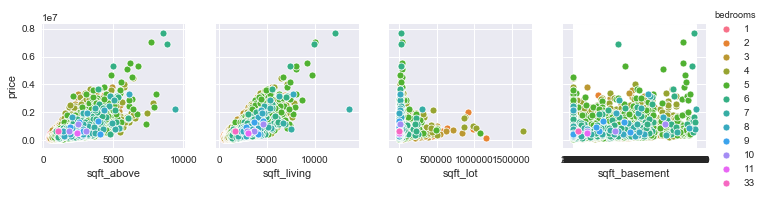

In [410]:
#Visualizing the data
sns.pairplot(data, x_vars=["sqft_above", "sqft_living", "sqft_lot", "sqft_basement"], y_vars=["price"], hue = "bedrooms")

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

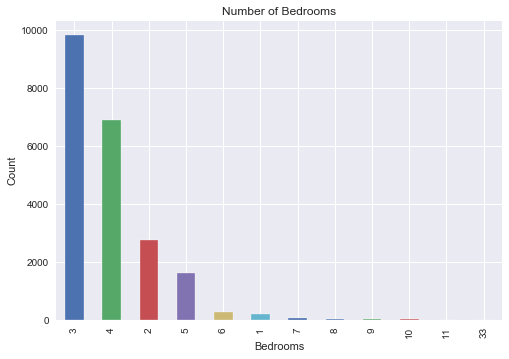

In [411]:
#checking to see which house is the most common(bedroom wise)
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

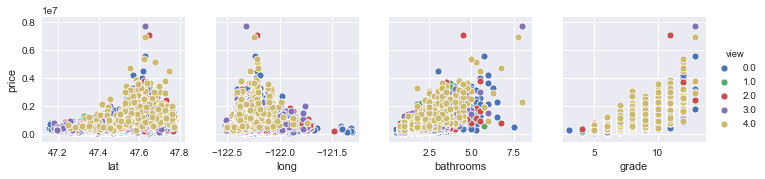

In [412]:
#Visualizing the data
sns.pairplot(data, 
             x_vars=["lat", "long", "bathrooms", "grade"], 
             y_vars=["price"],
             hue = "view")
             

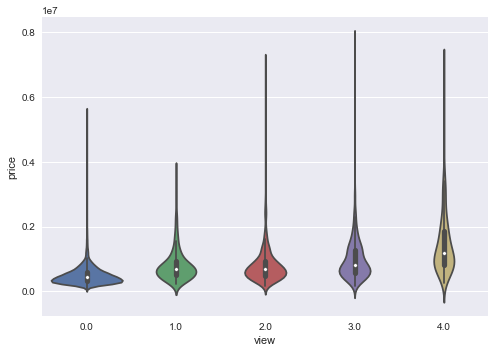

In [413]:
# Using violin plot to plot View feature
sns.violinplot(data=df, x = 'view', y = 'price')

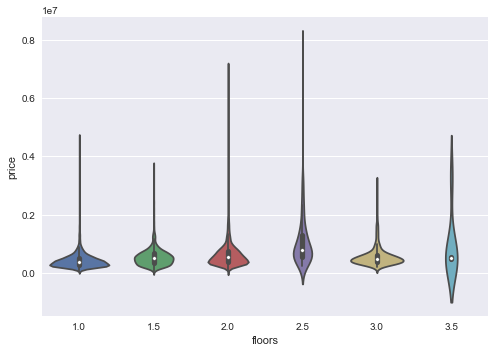

In [414]:
# Using violin plot to plot floors feature
sns.violinplot(data=df, x = 'floors', y = 'price')

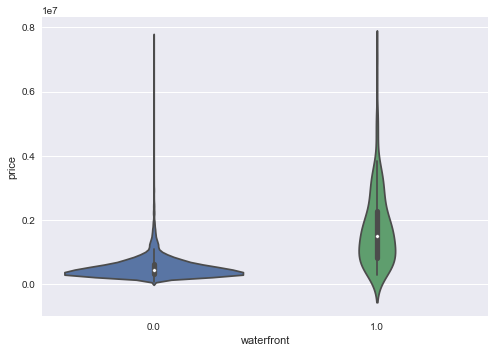

In [415]:
# Using violin plot to plot waterfront feature
sns.violinplot(data=df, x = 'waterfront', y = 'price')

In [416]:
#checking the shape of the dataset
data.shape

(21597, 19)

In [417]:
#finding Null values
data.isna().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [418]:
#Number of NaNs the in KC house dataset by column
data.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [419]:
# find duplicates
duplicates = data[data.duplicated()]
print(len(duplicates))

4


In [420]:
# dropping duplicate values 
data.drop_duplicates(keep='first',inplace=True) 

In [421]:
#check for duplicates
duplicates = data[data.duplicated()]
print(len(duplicates))

0


In [422]:
# checking for missing values with placeholders
for col in data.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(10), '\n\n')

price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
325000.0    0.006853
400000.0    0.006714
375000.0    0.006390
300000.0    0.006158
525000.0    0.006066
Name: price, dtype: float64 


bedrooms 
 3     0.454878
4     0.318655
2     0.127796
5     0.074131
6     0.012594
1     0.009075
7     0.001760
8     0.000602
9     0.000278
10    0.000139
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
1.50    0.066907
2.75    0.054869
3.00    0.034866
3.50    0.033847
3.25    0.027272
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
1800    0.005973
1820    0.005927
1480    0.005788
1720    0.005788
1540    0.005742
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
4800    0.005510
4500 

sqft_basement has a ? for roughly 2% 

In [423]:
# replace ? with nan
data.replace(['?',], np.nan, inplace=True)

In [424]:
#checking to make sure ? is replaced with nan
for col in data.columns:
    print(col, '\n', data[col].value_counts(normalize=True).head(10), '\n\n')

price 
 450000.0    0.007966
350000.0    0.007966
550000.0    0.007363
500000.0    0.007039
425000.0    0.006947
325000.0    0.006854
400000.0    0.006715
375000.0    0.006391
300000.0    0.006159
525000.0    0.006067
Name: price, dtype: float64 


bedrooms 
 3     0.454823
4     0.318714
2     0.127773
5     0.074144
6     0.012597
1     0.009077
7     0.001760
8     0.000602
9     0.000278
10    0.000139
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248923
1.00    0.178345
1.75    0.141157
2.25    0.094753
2.00    0.089335
1.50    0.066920
2.75    0.054879
3.00    0.034872
3.50    0.033854
3.25    0.027277
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006391
1400    0.006252
1440    0.006159
1660    0.005974
1010    0.005974
1800    0.005974
1820    0.005928
1480    0.005789
1720    0.005789
1540    0.005743
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016579
6000    0.013430
4000    0.011624
7200    0.010188
4800    0.005511
7500    0.005511
4500 

In [425]:
df = data.drop(['waterfront', 'view', 'yr_renovated'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


In [426]:
# Dropping Rows That Contain Null Values and checking for null values
data = df.dropna()
data.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [427]:
#checking the shape of my data
data.shape

(21139, 16)

In [428]:
#checking the data
data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,3,11,3890,1530.0,2001,98053,47.6561,-122.005,4760,101930
7,291850.0,3,1.50,1060,9711,1.0,3,7,1060,0.0,1963,98198,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,3,7,1050,730.0,1960,98146,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,3,7,1890,0.0,2003,98038,47.3684,-122.031,2390,7570
10,662500.0,3,2.50,3560,9796,1.0,3,8,1860,1700.0,1965,98007,47.6007,-122.145,2210,8925


### multicollinearity check

In [429]:
#checking for multicolinearity of features
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.309177,0.525894,0.702326,0.087927,0.256452,0.035273,0.667846,0.605133,0.054508,-0.053142,0.306503,0.022061,0.586407,0.083180
bedrooms,0.309177,1.000000,0.513892,0.577970,0.032223,0.179255,0.025632,0.357068,0.479182,0.157212,-0.152643,-0.009540,0.131038,0.392422,0.030433
bathrooms,0.525894,0.513892,1.000000,0.755316,0.087899,0.504141,-0.127991,0.666530,0.686478,0.508435,-0.204273,0.024993,0.224478,0.570159,0.088849
sqft_living,0.702326,0.577970,0.755316,1.000000,0.172920,0.354933,-0.061352,0.763295,0.876675,0.319638,-0.198871,0.052981,0.240732,0.756366,0.184438
sqft_lot,0.087927,0.032223,0.087899,0.172920,1.000000,-0.007439,-0.009707,0.113468,0.183453,0.052851,-0.129375,-0.085461,0.230582,0.143407,0.720644
floors,0.256452,0.179255,0.504141,0.354933,-0.007439,1.000000,-0.264188,0.459105,0.524466,0.489508,-0.059011,0.048985,0.126134,0.280519,-0.011450
condition,0.035273,0.025632,-0.127991,-0.061352,-0.009707,-0.264188,1.000000,-0.148417,-0.159332,-0.362026,0.003406,-0.015599,-0.106334,-0.093554,-0.004901
grade,0.667846,0.357068,0.666530,0.763295,0.113468,0.459105,-0.148417,1.000000,0.756554,0.448010,-0.185145,0.113403,0.199323,0.713772,0.121995
sqft_above,0.605133,0.479182,0.686478,0.876675,0.183453,0.524466,-0.159332,0.756554,1.000000,0.425336,-0.260755,-0.000357,0.344484,0.730990,0.195623
yr_built,0.054508,0.157212,0.508435,0.319638,0.052851,0.489508,-0.362026,0.448010,0.425336,1.000000,-0.347360,-0.148739,0.409501,0.325632,0.071505


In [430]:
# checking for correlation greater than .75
abs(data.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,True,True,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


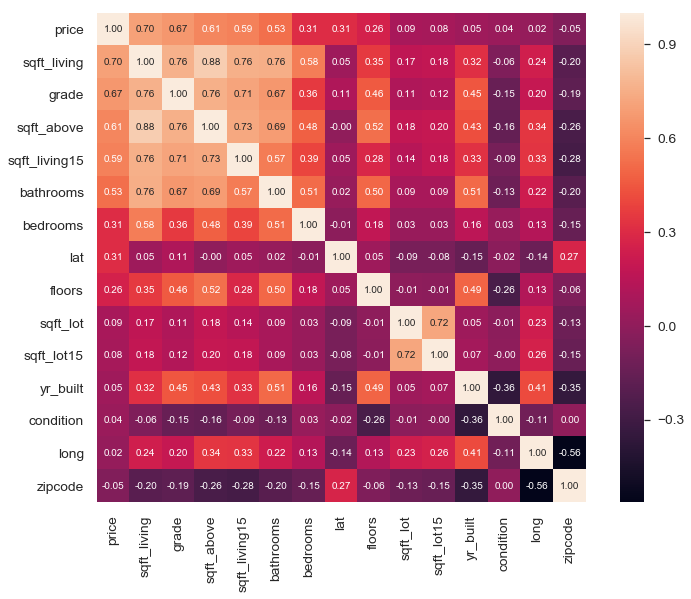

In [431]:
# Generating Heatmap
corrmat = data.corr()
k = 18 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


 after looking at heat map i removed sqft-living also removed lat, long, zipcode, sqft_basement since i dont plan to use them.


In [432]:
#dropping sqft_living due to high correlation, and lat, long, zipcode, sqft_basement
data = data.drop(['sqft_living', 'lat', 'long', 'zipcode', 'sqft_basement'], axis=1)

In [433]:
data.head(12)

,price,bedrooms,bathrooms,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,5650,1.0,3,7,1180,1955,1340,5650
1,538000.0,3,2.25,7242,2.0,3,7,2170,1951,1690,7639
2,180000.0,2,1.00,10000,1.0,3,6,770,1933,2720,8062
3,604000.0,4,3.00,5000,1.0,5,7,1050,1965,1360,5000
4,510000.0,3,2.00,8080,1.0,3,8,1680,1987,1800,7503
5,1230000.0,4,4.50,101930,1.0,3,11,3890,2001,4760,101930
7,291850.0,3,1.50,9711,1.0,3,7,1060,1963,1650,9711
8,229500.0,3,1.00,7470,1.0,3,7,1050,1960,1780,8113
9,323000.0,3,2.50,6560,2.0,3,7,1890,2003,2390,7570
10,662500.0,3,2.50,9796,1.0,3,8,1860,1965,2210,8925


# Explore

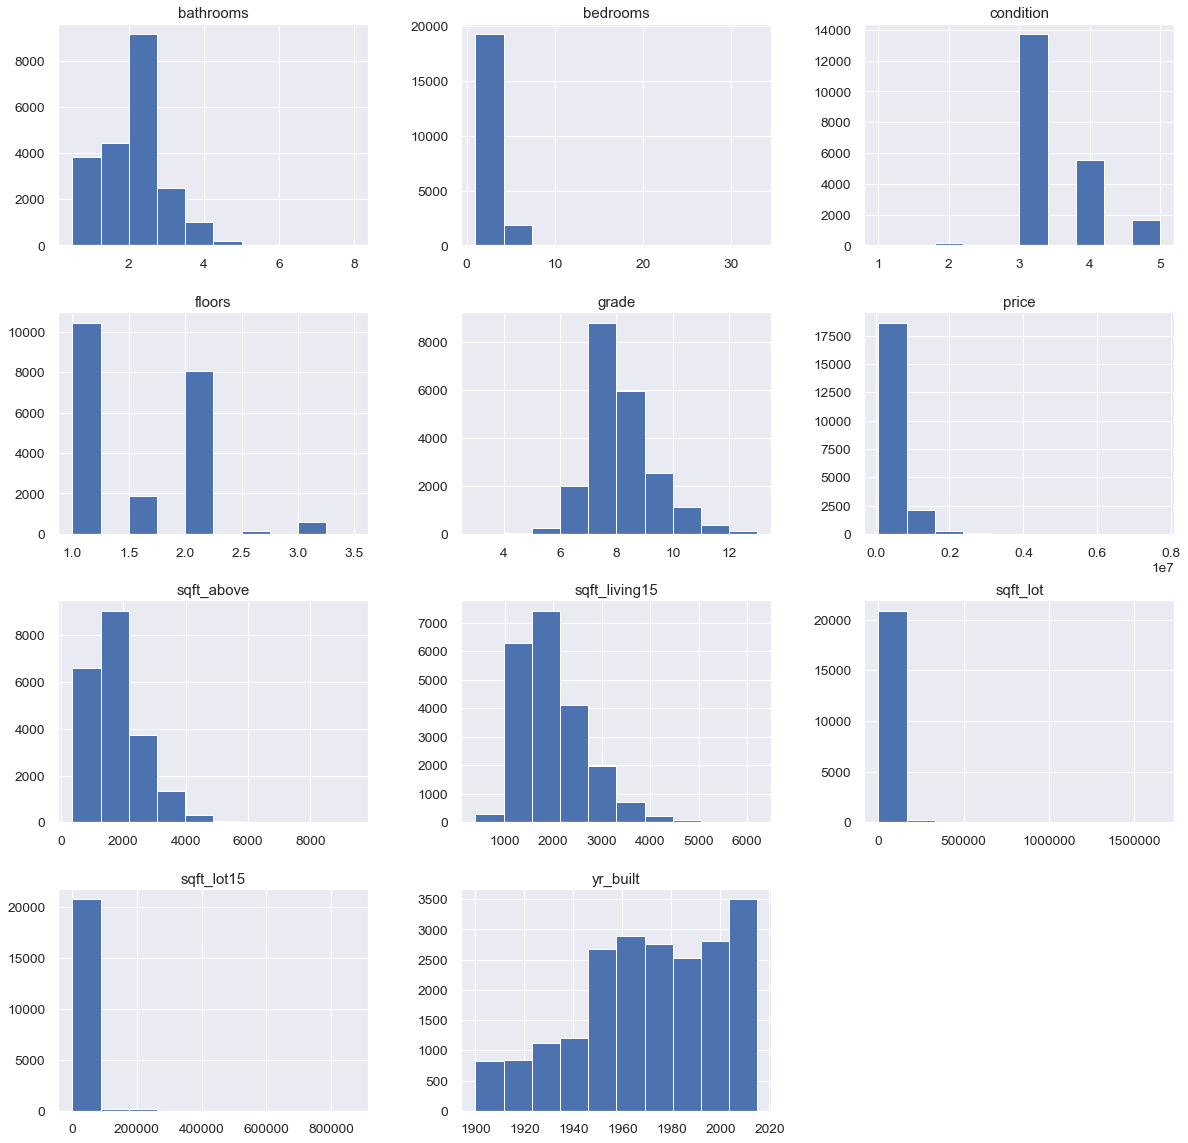

In [434]:
#checking for distribution
data.hist(figsize=(20,20));

In [435]:
# bin the year built
bins_yr_built = pd.cut(x =data['yr_built'], bins=[1889, 1930,1960,1990,2015] )

In [436]:
# Using pd.cut() returns unordered categories. Transform this to ordered categories 
bins_yr_built =  bins_yr_built.cat.as_ordered()
bins_yr_built.head()

0    (1930, 1960]
1    (1930, 1960]
2    (1930, 1960]
3    (1960, 1990]
4    (1960, 1990]
Name: yr_built, dtype: category
Categories (4, interval[int64]): [(1889, 1930] < (1930, 1960] < (1960, 1990] < (1990, 2015]]

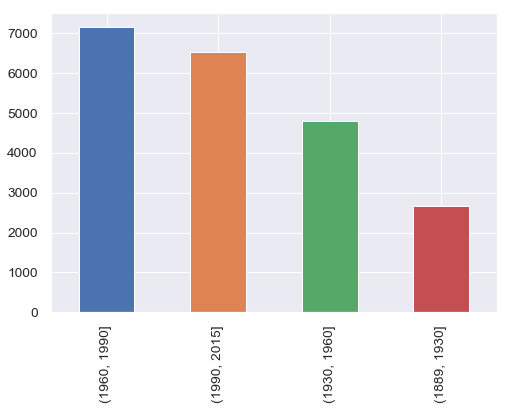

In [437]:
 #Inspect the result
bins_yr_built.value_counts().plot(kind='bar')

In [438]:
#inserting binned year built into dataset
data['yr_built'] = bins_yr_built
data['yr_built'] = data['yr_built'].cat.codes
data.head(10)

,price,bedrooms,bathrooms,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,5650,1.0,3,7,1180,1,1340,5650
1,538000.0,3,2.25,7242,2.0,3,7,2170,1,1690,7639
2,180000.0,2,1.00,10000,1.0,3,6,770,1,2720,8062
3,604000.0,4,3.00,5000,1.0,5,7,1050,2,1360,5000
4,510000.0,3,2.00,8080,1.0,3,8,1680,2,1800,7503
5,1230000.0,4,4.50,101930,1.0,3,11,3890,3,4760,101930
7,291850.0,3,1.50,9711,1.0,3,7,1060,2,1650,9711
8,229500.0,3,1.00,7470,1.0,3,7,1050,1,1780,8113
9,323000.0,3,2.50,6560,2.0,3,7,1890,3,2390,7570
10,662500.0,3,2.50,9796,1.0,3,8,1860,2,2210,8925


### Scaling

In [439]:
# scaling 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = data.drop('price', axis=1).columns

#data_clean = pd.DataFrame(data['price'])
for col in cols:
    var =scaler.fit_transform(data[col].values.reshape(-1, 1))
    data[col]= var.flatten()
data.describe().round(3)
    

,price,bedrooms,bathrooms,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
count,21139.000,21139.000,21139.000,21139.000,21139.000,21139.000,21139.000,21139.000,21139.000,21139.000,21139.000
mean,540521.730,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000
std,368104.682,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,78000.000,-2.565,-2.103,-0.354,-0.915,-3.705,-3.967,-1.713,-1.821,-2.316,-0.445
25%,322000.000,-0.403,-0.476,-0.244,-0.915,-0.630,-0.560,-0.711,-0.826,-0.725,-0.281
50%,450000.000,-0.403,0.174,-0.181,0.012,-0.630,-0.560,-0.277,0.170,-0.215,-0.188
75%,645000.000,0.678,0.500,-0.107,0.940,0.907,0.291,0.508,1.165,0.544,-0.098
max,7700000.000,32.032,7.656,39.704,3.722,2.444,4.549,9.199,1.165,6.158,31.595


In [440]:
#getting data betweem -3 and 3 tot take care of the outliers
df = data.drop('price', axis=1)[np.abs(data) < 3]
df['price'] = data['price']
df.head(30)

,bedrooms,bathrooms,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,price
0,-0.402926,-1.452091,-0.229049,-0.915226,-0.630266,-0.560432,-0.735260,-0.825585,-0.944069,-0.260968,221900.0
1,-0.402926,0.174295,-0.190420,0.939530,-0.630266,-0.560432,0.459781,-0.825585,-0.433626,-0.187764,538000.0
2,-1.484097,-1.452091,-0.123497,-0.915226,-0.630266,-1.412057,-1.230175,-0.825585,1.068536,-0.172196,180000.0
3,0.678244,1.150126,-0.244822,-0.915226,2.444197,-0.560432,-0.892184,0.169627,-0.914901,-0.284890,604000.0
4,-0.402926,-0.150983,-0.170086,-0.915226,-0.630266,0.291194,-0.131704,0.169627,-0.273201,-0.192770,510000.0
5,0.678244,NaN,2.107177,-0.915226,-0.630266,2.846070,2.536012,1.164839,NaN,NaN,1230000.0
7,-0.402926,-0.801537,-0.130510,-0.915226,-0.630266,-0.560432,-0.880113,0.169627,-0.491962,-0.111506,291850.0
8,-0.402926,-1.452091,-0.184887,-0.915226,-0.630266,-0.560432,-0.892184,-0.825585,-0.302369,-0.170319,229500.0
9,-0.402926,0.499572,-0.206968,0.939530,-0.630266,-0.560432,0.121789,1.164839,0.587260,-0.190304,323000.0
10,-0.402926,0.499572,-0.128447,-0.915226,-0.630266,0.291194,0.085576,0.169627,0.324747,-0.140434,662500.0


In [441]:
# dropping the nan values
df = df.dropna()

In [442]:
#checking the data
df.head()

,bedrooms,bathrooms,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,price
0,-0.402926,-1.452091,-0.229049,-0.915226,-0.630266,-0.560432,-0.735260,-0.825585,-0.944069,-0.260968,221900.0
1,-0.402926,0.174295,-0.190420,0.939530,-0.630266,-0.560432,0.459781,-0.825585,-0.433626,-0.187764,538000.0
2,-1.484097,-1.452091,-0.123497,-0.915226,-0.630266,-1.412057,-1.230175,-0.825585,1.068536,-0.172196,180000.0
3,0.678244,1.150126,-0.244822,-0.915226,2.444197,-0.560432,-0.892184,0.169627,-0.914901,-0.284890,604000.0
4,-0.402926,-0.150983,-0.170086,-0.915226,-0.630266,0.291194,-0.131704,0.169627,-0.273201,-0.192770,510000.0


In [443]:
df.describe().round(3)

,bedrooms,bathrooms,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,price
count,20116.000,20116.000,20116.000,20116.000,20116.000,20116.000,20116.000,20116.000,20116.000,20116.000,20116.000
mean,-0.034,-0.062,-0.119,-0.021,0.015,-0.059,-0.082,-0.020,-0.068,-0.125,513754.333
std,0.927,0.916,0.289,0.997,0.995,0.909,0.870,0.999,0.907,0.339,297494.092
min,-2.565,-2.103,-0.354,-0.915,-2.167,-2.264,-1.713,-1.821,-2.227,-0.445,82000.000
25%,-0.403,-0.802,-0.245,-0.915,-0.630,-0.560,-0.735,-0.826,-0.754,-0.284,319000.000
50%,-0.403,0.174,-0.184,-0.915,-0.630,-0.560,-0.313,0.170,-0.244,-0.193,444250.000
75%,0.678,0.500,-0.120,0.940,0.907,0.291,0.411,1.165,0.471,-0.110,625000.000
max,2.841,2.777,2.963,2.794,2.444,2.846,2.995,1.165,2.997,2.984,3600000.000


In [444]:
#selecting data excluding price
data_pred = df.iloc[:,:10]
data_pred.head()

,bedrooms,bathrooms,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
0,-0.402926,-1.452091,-0.229049,-0.915226,-0.630266,-0.560432,-0.735260,-0.825585,-0.944069,-0.260968
1,-0.402926,0.174295,-0.190420,0.939530,-0.630266,-0.560432,0.459781,-0.825585,-0.433626,-0.187764
2,-1.484097,-1.452091,-0.123497,-0.915226,-0.630266,-1.412057,-1.230175,-0.825585,1.068536,-0.172196
3,0.678244,1.150126,-0.244822,-0.915226,2.444197,-0.560432,-0.892184,0.169627,-0.914901,-0.284890
4,-0.402926,-0.150983,-0.170086,-0.915226,-0.630266,0.291194,-0.131704,0.169627,-0.273201,-0.192770


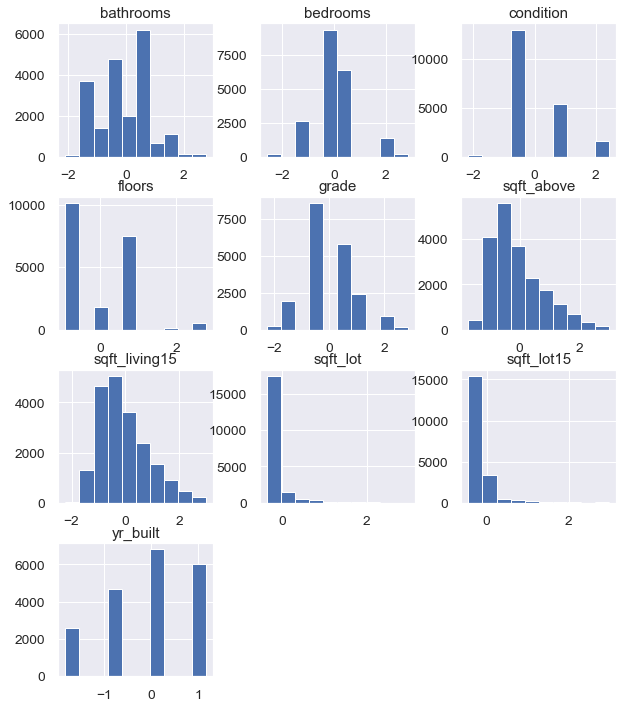

In [445]:
#checking histogram
data_pred.hist(figsize = [10,12]);

In [446]:
# dropping sqft_lot since i dont plan to use it in the
#data_pred = data_pred.drop('sqft_lot', axis=1)

# Model

In [447]:
price = df['price']
data_ols = pd.concat([price, data_pred], axis=1)
data_ols.head(10)

,price,bedrooms,bathrooms,sqft_lot,floors,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15
0,221900.0,-0.402926,-1.452091,-0.229049,-0.915226,-0.630266,-0.560432,-0.735260,-0.825585,-0.944069,-0.260968
1,538000.0,-0.402926,0.174295,-0.190420,0.939530,-0.630266,-0.560432,0.459781,-0.825585,-0.433626,-0.187764
2,180000.0,-1.484097,-1.452091,-0.123497,-0.915226,-0.630266,-1.412057,-1.230175,-0.825585,1.068536,-0.172196
3,604000.0,0.678244,1.150126,-0.244822,-0.915226,2.444197,-0.560432,-0.892184,0.169627,-0.914901,-0.284890
4,510000.0,-0.402926,-0.150983,-0.170086,-0.915226,-0.630266,0.291194,-0.131704,0.169627,-0.273201,-0.192770
7,291850.0,-0.402926,-0.801537,-0.130510,-0.915226,-0.630266,-0.560432,-0.880113,0.169627,-0.491962,-0.111506
8,229500.0,-0.402926,-1.452091,-0.184887,-0.915226,-0.630266,-0.560432,-0.892184,-0.825585,-0.302369,-0.170319
9,323000.0,-0.402926,0.499572,-0.206968,0.939530,-0.630266,-0.560432,0.121789,1.164839,0.587260,-0.190304
10,662500.0,-0.402926,0.499572,-0.128447,-0.915226,-0.630266,0.291194,0.085576,0.169627,0.324747,-0.140434
11,468000.0,-1.484097,-1.452091,-0.220557,-0.915226,0.906966,-0.560432,-1.121535,-0.825585,-0.958653,-0.248086


In [448]:
# importing statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [449]:
#running model formula
outcome = 'price'
predictors = data_ols.drop(['price', 'condition'], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [450]:
# getting the summy of the model
model = ols(formula= formula, data=data_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     2824.
Date:                Thu, 07 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:24:31   Log-Likelihood:            -2.7385e+05
No. Observations:               20116   AIC:                         5.477e+05
Df Residuals:                   20106   BIC:                         5.478e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.266e+05   1516.960    347.158      0.000    5.24e+05     5.3e+05
bedrooms      -1.164e+04   1856.536     -6.268      0.000   -1.53e+04   -7998.465
bathrooms      6.683e+04   2388.331     27.981      0.000    6.21e+04    7.15e+04
sqft_lot        -46.8977   8372.110     -0.006      0.996   -1.65e+04    1.64e+04
floors         2483.0064   1918.711      1.294      0.196   -1277.825    6243.838
grade          1.608e+05   2506.783     64.127      0.000    1.56e+05    1.66e+05
sqft_above     3.453e+04   3025.783     11.411      0.000    2.86e+04    4.05e+04
yr_built      -1.221e+05   1728.499    -70.630      0.000   -1.25e+05   -1.19e+05
sqft_living15  6.577e+04   2493.189     26.380      0.000    6.09e+04    7.07e+04
sqft_lot15    -4.208e+04   7197.874     -5.846      0.000   -5.62e+04    -2.8e+04
==============================================================================
Omnibus:                    10811.325   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           181311.707
Skew:                           2.210   Prob(JB):                         0.00
Kurtosis:                      17.028   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [451]:
#calling the parameters
coef = model.params
coef

Intercept        526625.433254
bedrooms         -11637.426808
bathrooms         66828.188687
sqft_lot            -46.897691
floors             2483.006368
grade            160753.590253
sqft_above        34526.304935
yr_built        -122084.582718
sqft_living15     65771.347221
sqft_lot15       -42079.351729
dtype: float64

### Linear regression using Scikit learn

In [452]:
from sklearn.linear_model import LinearRegression

In [453]:
y = data_ols['price']
linreg = LinearRegression()
linreg.fit(predictors, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [454]:
# coefficients
linreg.coef_

array([-1.16374268e+04,  6.68281887e+04, -4.68976908e+01,  2.48300637e+03,
        1.60753590e+05,  3.45263049e+04, -1.22084583e+05,  6.57713472e+04,
       -4.20793517e+04])

In [455]:
# intercept
linreg.intercept_

526625.4332543842

## scatter plot and regression line for the model

In [456]:
Sqft_living15 = data_ols['sqft_living15'].values
Price = data_ols['price'].values

Text(0.5, 0, 'sqft_living15')

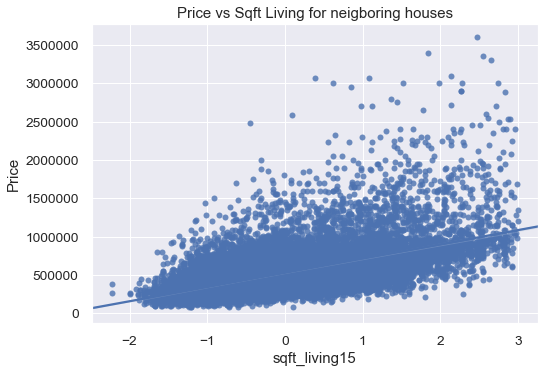

In [457]:
#regression line and scatter plot for price vs sqft_living15
Sqft_living15 = data_ols['sqft_living15'].values
Price = data_ols['price'].values

sns.regplot(x= Sqft_living15, y= Price)

plt.title("Price vs Sqft Living for neigboring houses")
plt.ylabel('Price')
plt.xlabel("sqft_living15")

Text(0.5, 0, 'sqft above ground')

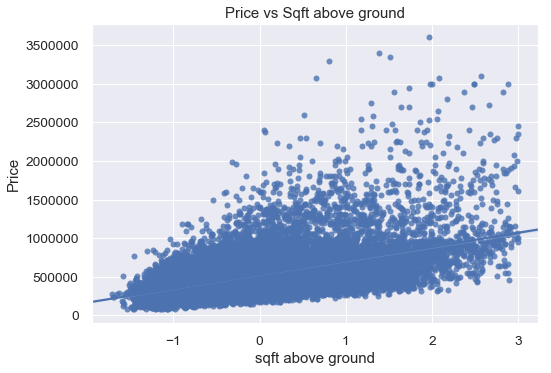

In [458]:
#regression line and scatter plot for price vs sqft_above
Sqft_above = data_ols['sqft_above'].values
Price = data_ols['price'].values

sns.regplot(x= Sqft_above, y= Price)

plt.title("Price vs Sqft above ground")
plt.ylabel('Price')
plt.xlabel("sqft above ground")


Text(0.5, 0, 'Grade')

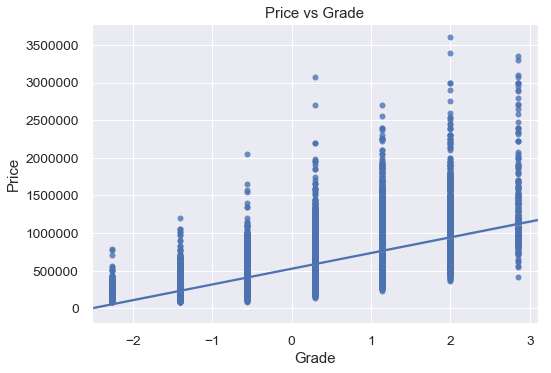

In [459]:
#regression line and scatter plot for price vs grade
Grade = data_ols['grade'].values
Price = data_ols['price'].values

sns.regplot(x= Grade, y= Price)

plt.title("Price vs Grade")
plt.ylabel('Price')
plt.xlabel("Grade")

Text(0.5, 0, 'bathrooms')

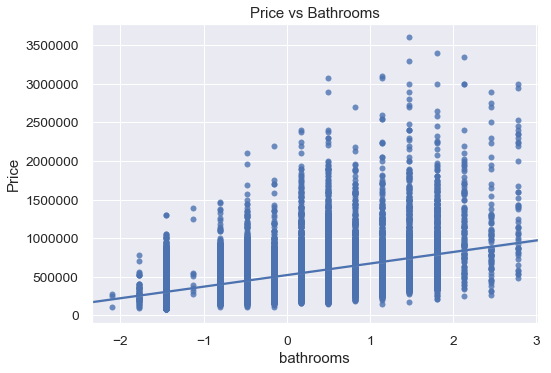

In [460]:
#scatter plot for price vs bethrooms
Bathrooms = data_ols['bathrooms'].values
Price = data_ols['price'].values

sns.regplot(x= Bathrooms, y= Price)

plt.title("Price vs Bathrooms")
plt.ylabel('Price')
plt.xlabel("bathrooms")

### QQplot

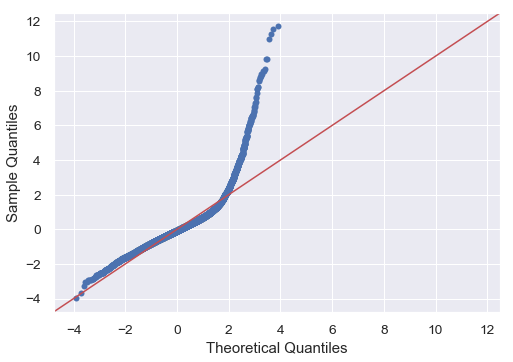

In [461]:
resid1 = model.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)

In [462]:
# From the QQplot it is obvious that there is lighter mass on the top left end tail indicationg outliers

In [463]:
# From the model the features that affect price significatly are sqft_living15, sqft_above, bathrooms, condition and grade.
# as these features increase so does the prices of the house
#Conclusion is that for the prices to increase we will need to renovate the house by increasing the square feet living of the house and encourage neighbors to do same
#increase in the number of bathrooms will also increase the price of the house

### recommendations

- Increase the number of bathrooms, 
- Increase sqft_above, 
- Improve the condition of the house(s)  
- improve the grade of the house.
